In [32]:
# Exercise 7-12
rm(list=ls())

In [33]:
# Parms:
n <- 200
p <- 100
n_iter <- 50
scale <- 20
shift <- 10

In [34]:
# Create feature data: one matrix with covariates only and a second with intercept appended:
set.seed(1)
x <- c()
for (i in 1:p)
{
    temp <- (runif(n)*scale-shift)
    x <- cbind(x, temp)
}
# nrow(x); ncol(x)

# Append intercept col:
x_int <- cbind(matrix(1,nrow=nrow(x),ncol=1), x)
print(x_int[1:5,1:5])

            temp       temp      temp      temp
[1,] 1 -4.689827 -4.6498359  3.177552  6.285035
[2,] 1 -2.557522 -5.6270943 -6.298601  8.575545
[3,] 1  1.457067  0.3359367  9.087563 -7.050379
[4,] 1  8.164156 -4.6209882  7.956970  4.996433
[5,] 1 -5.966361 -6.3766335  8.873941  9.513147


In [35]:
# Create true parms:
coef_pool_init <- seq(from=-10, to=10, by=1)
# Need to exclude 0 or else it will cause numerical issues with the regression.
coef_pool <- coef_pool_init[-11]
# Select (p+1) coefficients: for the p features plus the 1 intercept:
beta_true <- matrix(sample(coef_pool, p+1, replace=TRUE))
# nrow(beta_true); ncol(beta_true)
# nrow(x_int); ncol(x_int)

# Create response:
y <- (x_int %*% beta_true)
# nrow(y); ncol(y)
# head(y)

# Initialize matrix to hold beta estimates after each iteration, and ensure that the parm estimates
# chosen for the first iter is different from beta_true:
set.seed(2)
beta_est <- matrix(sample(coef_pool, p+1, replace=TRUE))
# nrow(beta_est); ncol(beta_est)
# print(beta_est); print(beta_true)

In [36]:
# Perform backfitting algorithm:
beta_storage <- beta_est
for (j in 1:n_iter)  
{
    for (k in 1:p)
    {
        # Create index var, since 1st var will be int, 2nd var is first feature, etc.
        index <- (k+1)
        beta_helper <- matrix(beta_est[-c(1,index)], nrow=(p-1), ncol=1)
        # First step: offset
        y_offset <- (y - x[,-k] %*% beta_helper)
        model <- lm(y_offset~x[,k])
        # Save coef before the feature in question (this will always be the 2nd coef in a simmple regression):
        beta_est[index,1] <- model$coef[2]
        # print(beta_est)
    }
    # Update intercept at the end of each iteration:
    beta_est[1,1] <- model$coef[1]
    # Save values at end of each iteration:
    beta_storage <- cbind(beta_storage, beta_est)
}

In [37]:
head(beta_storage)
# Clearly more iterations are necessary to obtain a "good" approximation to the multiple regression estimates.

-7,14.054528,5.2220699,-1.4241989,-3.6027597,-4.843335,-5.644500,-6.133595,-6.405157,-6.528645,...,-6.001036,-6.000836,-6.000675,-6.000546,-6.000441,-6.000357,-6.000288,-6.000233,-6.000189,-6.000153
5,-15.684737,-7.9271014,-6.3062204,-6.8700967,-7.221194,-7.432176,-7.570634,-7.666060,-7.736777,...,-7.999885,-7.999908,-7.999926,-7.999941,-7.999953,-7.999962,-7.999969,-7.999975,-7.999980,-7.999984
2,-6.242017,-4.7794825,-5.3335941,-6.0066968,-6.574194,-7.009888,-7.319722,-7.533810,-7.680075,...,-7.999861,-7.999886,-7.999906,-7.999923,-7.999937,-7.999948,-7.999957,-7.999965,-7.999971,-7.999976
-7,-5.922028,-5.6530582,-5.2351854,-4.8765126,-4.478463,-4.177536,-3.989112,-3.881798,-3.828474,...,-3.999536,-3.999626,-3.999698,-3.999757,-3.999804,-3.999842,-3.999872,-3.999897,-3.999917,-3.999933
9,-15.271229,-9.5018913,-7.5783403,-6.9480956,-6.793465,-6.794488,-6.852343,-6.917578,-6.969834,...,-7.000142,-7.000114,-7.000092,-7.000074,-7.000060,-7.000048,-7.000039,-7.000031,-7.000025,-7.000020
9,2.612389,-0.3312846,0.3356151,0.6102665,0.870394,1.028555,1.113080,1.149922,1.157915,...,1.000250,1.000200,1.000160,1.000129,1.000103,1.000083,1.000066,1.000053,1.000043,1.000034


In [38]:
# Create multiple regression
mult <- lm(y~x)
# summary(mult)
# Results are essentially the same as beta_true, so I'll use that.
# Here I compute the 2-norm between each iter and beta_true:
two_norm <- matrix(0, nrow=n_iter, ncol=1)
for (i in 1:n_iter)
{
    two_norm[i,1] <- sqrt(sum((beta_storage[,(i+1)]-beta_true)^2))
}

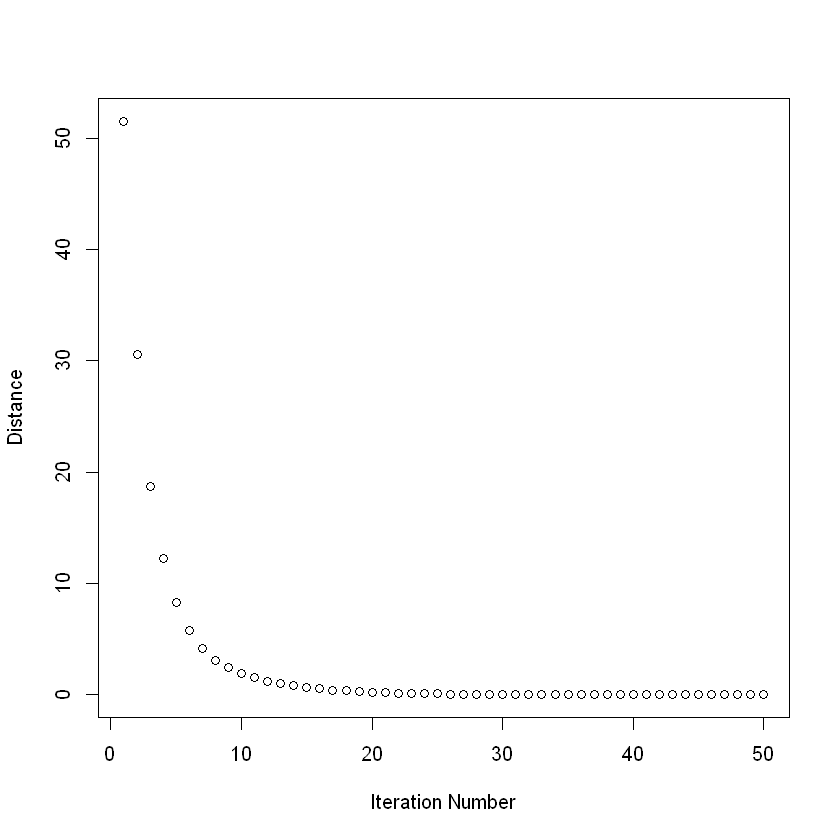

In [39]:
# Plot:
plot(1:n_iter, two_norm, xlab="Iteration Number", ylab="Distance")
# Qualitatively speaking, it takes about 10 iterations in order to obtain a "good approximation" of beta_true.
# I imagine this is due in part to the fact we had so many more (100) features, rather than just two.